In [23]:
from scipy import signal
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
def gkern(kernlen=5, nsig=1):
    # Generate a kernal using a guassian distribution
    x = np.linspace(-nsig, nsig, kernlen+1)
    kern1d = np.diff(stats.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

In [25]:
# Convolution techniques based on specific
def guassian_blur(m1):
    # Guassian Blur 
    m2 = gkern()
    return signal.convolve(m1, m2, "valid")

def sharpen(m1):
    # Sharpen
    m2 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    return signal.convolve(m1, m2, "valid")

def edge_det(m1):
    # Edge detection
    m2 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    return signal.convolve(m1, m2, "valid")

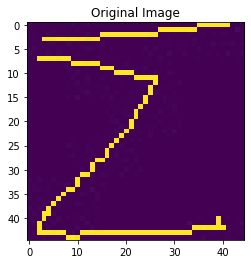

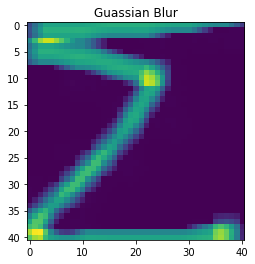

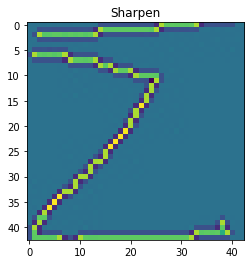

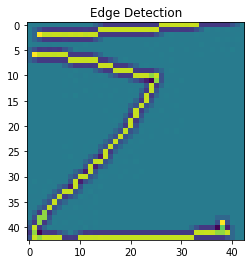

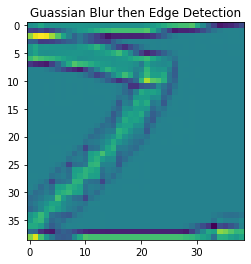

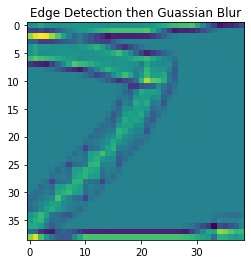

In [22]:
#import dataset
data = pd.read_csv("data.csv")
X = data.drop("label", axis=1)
features_numpy = X.values
data = None

img = features_numpy[1510].reshape(45,45)

plt.title("Original Image")
plt.imshow(img)
plt.show()

plt.title("Guassian Blur")
plt.imshow(guassian_blur(img))
plt.show()

plt.title("Sharpen")
plt.imshow(sharpen(img))
plt.show()

plt.title("Edge Detection")
plt.imshow(edge_det(img))
plt.show()

plt.title("Guassian Blur then Edge Detection")
plt.imshow(edge_det(guassian_blur(img)))
plt.show()

plt.title("Edge Detection then Guassian Blur")
plt.imshow(guassian_blur(edge_det(img)))
plt.show()




In [20]:
# Checking commutativity
x = edge_det(guassian_blur(img))
y = guassian_blur(edge_det(img))

print(np.sum(x==y))
print(np.sum(x!=y))


39
1482


In [15]:
# Checking if the random variables is changing
x = guassian_blur(img)
y = guassian_blur(img)

print(np.sum(x==y))

1681
